<a href="https://colab.research.google.com/github/Roshan-pro/GLOBAL-EARTHQUAKE-ANALYSIS/blob/main/Global_Earthquake_Analysis_and_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Global Earthquake-Tsunami Risk Assessment Dataset
**Overview**<br>
The Global Earthquake-Tsunami Risk Assessment Dataset is a comprehensive, machine learning-ready dataset containing seismic characteristics and tsunami potential indicators for 782 significant earthquakes recorded globally from 2001 to 2022. This dataset is specifically designed for tsunami risk prediction, earthquake analysis, and seismic hazard assessment applications.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import geopandas as gpd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from shapely.geometry import Point
import warnings
warnings.filterwarnings('ignore')
plt.style.use("dark_background")

In [ ]:
earthq=pd.read_csv(r"/kaggle/input/global-earthquake-tsunami-risk-assessment-dataset/earthquake_data_tsunami.csv")
earthq.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
earthq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  782 non-null    float64
 1   cdi        782 non-null    int64  
 2   mmi        782 non-null    int64  
 3   sig        782 non-null    int64  
 4   nst        782 non-null    int64  
 5   dmin       782 non-null    float64
 6   gap        782 non-null    float64
 7   depth      782 non-null    float64
 8   latitude   782 non-null    float64
 9   longitude  782 non-null    float64
 10  Year       782 non-null    int64  
 11  Month      782 non-null    int64  
 12  tsunami    782 non-null    int64  
dtypes: float64(6), int64(7)
memory usage: 79.6 KB


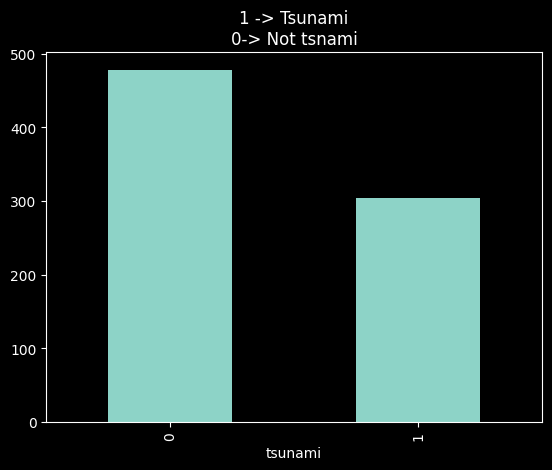

In [ ]:
earthq.tsunami.value_counts().plot(kind="bar",title="1 -> Tsunami\n0-> Not tsnami")
plt.show()

**🌊 Tsunami Classification**<br>
- Non-Tsunami Events: 478 records (61.1%)
- Tsunami-Potential Events: 304 records (38.9%)


In [ ]:
earthq.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
print("NULL value present:",earthq.isna().sum().any())
print("Duplicated items present :",earthq.duplicated().sum().any())
print(f"we have {earthq.shape[0]} data with {earthq.shape[1]} columns/features")

NULL value present: False
Duplicated items present : False
we have 782 data with 13 columns/features


- **The data is 100% complete (no null value present)** <br>
- **The data has no duplicate values** <br>
- **we have 782 data with 13 columns/features**

In [ ]:
earthq[earthq.magnitude >=8.0].shape

(28, 13)

Major earthquake events took 28 times


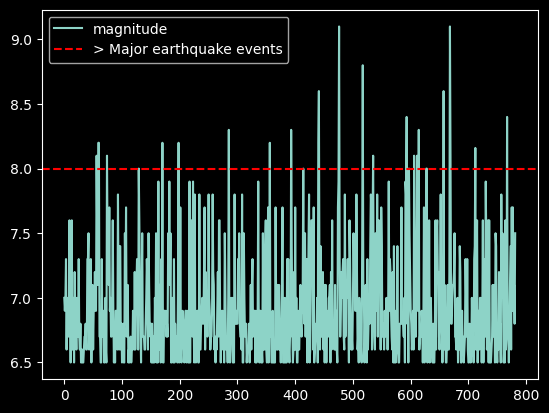

In [ ]:
print("Major earthquake events took",earthq[earthq.magnitude >=8.0].shape[0],"times")
earthq.magnitude.plot()
plt.axhline(y=8.0,
            color="red",
           label="> Major earthquake events",
           linestyle="--")
plt.legend()
plt.show()

## **Checking in which year and months the major earthquake(28 times) took place**

In [ ]:
earthq.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [ ]:
df_mazor_earthquake=earthq[earthq.magnitude >=8.0]

In [ ]:
gdf_mgreater_8 = gpd.GeoDataFrame(
    df_mazor_earthquake,
    geometry=gpd.points_from_xy(df_mazor_earthquake['longitude'], df_mazor_earthquake['latitude']),
    crs="EPSG:4326"
)
gdf_mgreater_8.head()


,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami,geometry
56,8.1,0,7,1009,0,7.463,78.0,22.79,-58.4157,-25.3206,2021,8,0,POINT (-25.3206 -58.4157)
59,8.2,8,6,1237,0,0.875,66.0,46.66,55.4742,-157.9170,2021,7,1,POINT (-157.917 55.4742)
60,8.2,8,7,1252,0,0.000,0.0,35.00,55.3154,-157.8290,2021,7,1,POINT (-157.829 55.3154)
74,8.1,9,8,1021,0,0.739,21.0,28.93,-29.7466,-177.2240,2021,3,1,POINT (-177.224 -29.7466)
129,8.0,9,8,1890,0,3.180,17.0,122.57,-5.8119,-75.2697,2019,5,1,POINT (-75.2697 -5.8119)


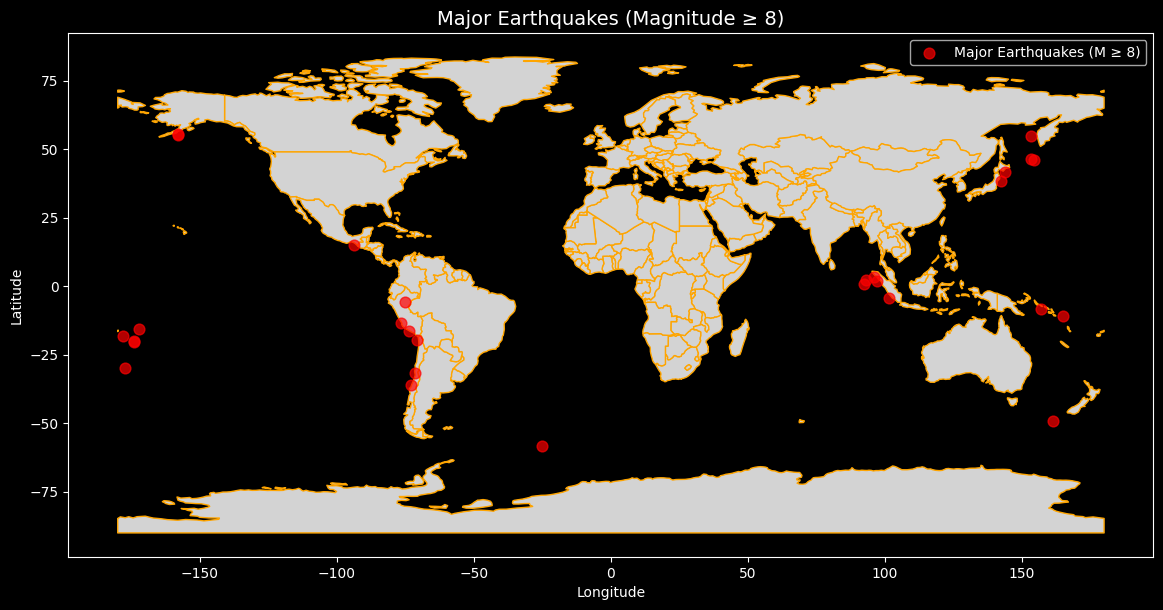

In [ ]:
url = "https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url)
fig, ax = plt.subplots(figsize=(14, 8))

world.plot(ax=ax, color="lightgray", edgecolor="orange")
gdf_mgreater_8.plot(
    ax=ax,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Major Earthquakes (M ≥ 8)"
)

ax.set_title("Major Earthquakes (Magnitude ≥ 8)", fontsize=14)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.legend()

plt.show()


## **Now checking area where acctually tsunami occur with manitude > 8**

In [ ]:
act_tsu_mag_g8=earthq.loc[(earthq.magnitude >=8.0)& (earthq.tsunami == 1),["longitude","latitude"]]
print(f"Actual tsunami with magnitude greater than 8 occurs in {act_tsu_mag_g8.shape[0]} areas")

Actual tsunami with magnitude greater than 8 occurs in 10 areas


In [ ]:
act_gdf_mgreater_8 = gpd.GeoDataFrame(
    act_tsu_mag_g8,
    geometry=gpd.points_from_xy(act_tsu_mag_g8['longitude'], act_tsu_mag_g8['latitude']),
    crs="EPSG:4326"
)
act_gdf_mgreater_8.head()

,longitude,latitude,geometry
59,-157.9170,55.4742,POINT (-157.917 55.4742)
60,-157.8290,55.3154,POINT (-157.829 55.3154)
74,-177.2240,-29.7466,POINT (-177.224 -29.7466)
129,-75.2697,-5.8119,POINT (-75.2697 -5.8119)
170,-178.1530,-18.1125,POINT (-178.153 -18.1125)


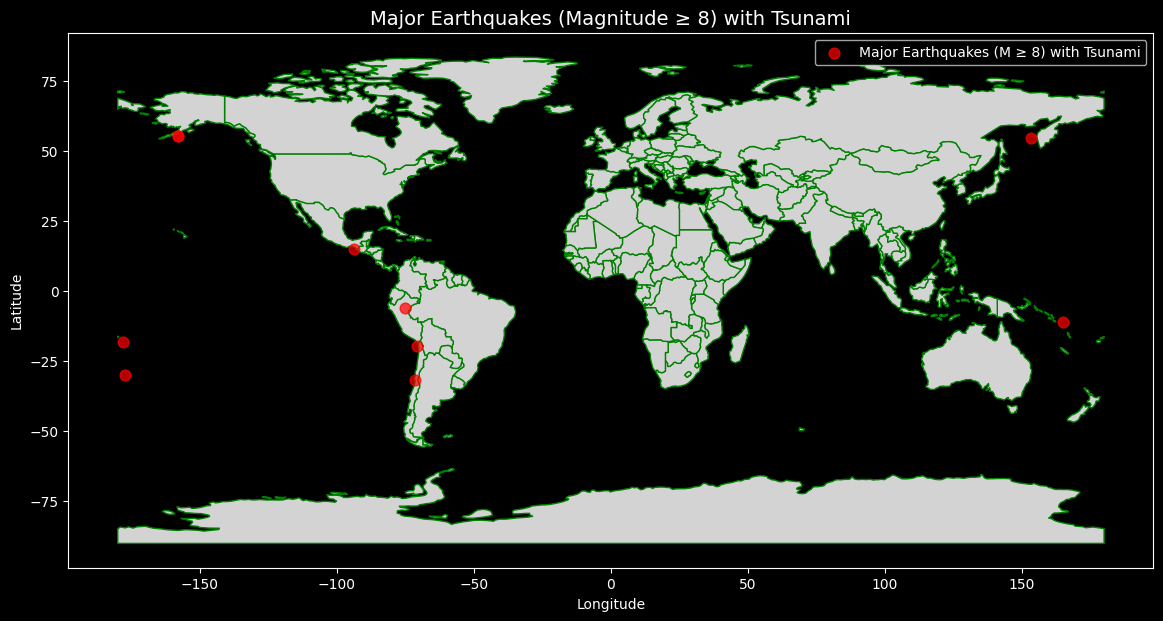

In [ ]:
world2 = gpd.read_file(url)
fig, ax2 = plt.subplots(figsize=(14, 8))

world2.plot(ax=ax2, color="lightgray", edgecolor="green")
act_gdf_mgreater_8.plot(
    ax=ax2,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Major Earthquakes (M ≥ 8) with Tsunami"
)

ax2.set_title("Major Earthquakes (Magnitude ≥ 8) with Tsunami", fontsize=14)
ax2.set_xlabel("Longitude")
ax2.set_ylabel("Latitude")
ax2.legend()

plt.show()


## **Areas where tsunami occured**

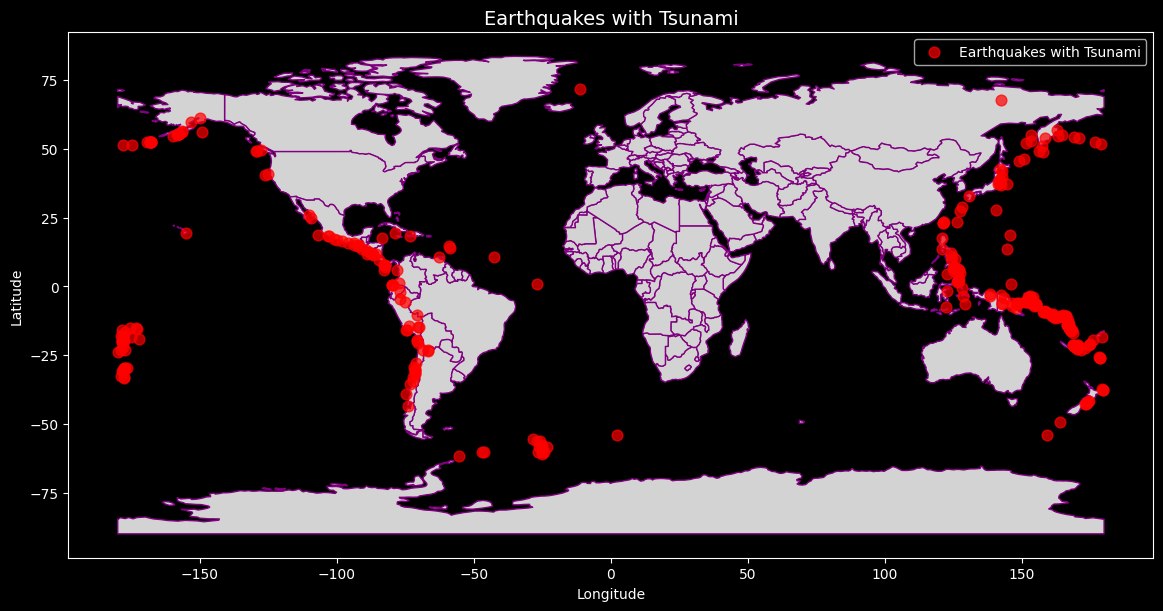

In [ ]:
tsunami_oocur=earthq[earthq.tsunami==1]
tsunami_h=gpd.GeoDataFrame(
    tsunami_oocur,
    geometry =gpd.points_from_xy(tsunami_oocur["longitude"],
                                tsunami_oocur["latitude"]),
    crs="EPSG:4326"
)
world3 = gpd.read_file(url)
fig, ax3 = plt.subplots(figsize=(14, 8))

world3.plot(ax=ax3, color="lightgray", edgecolor="purple")
tsunami_h.plot(
    ax=ax3,
    color="red",
    markersize=60,
    alpha=0.7,
    label="Earthquakes with Tsunami"
)

ax3.set_title("Earthquakes with Tsunami", fontsize=14)
ax3.set_xlabel("Longitude")
ax3.set_ylabel("Latitude")
ax3.legend()

plt.show()

**Tsunami** <br>
- 304 area

In [ ]:
earthq.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


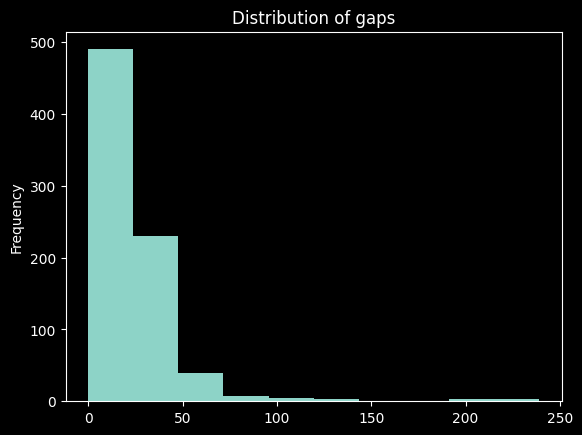

In [ ]:
earthq.gap.plot(kind="hist",
               title="Distribution of gaps")
plt.show()

**Gaps distribution is Right skewed**

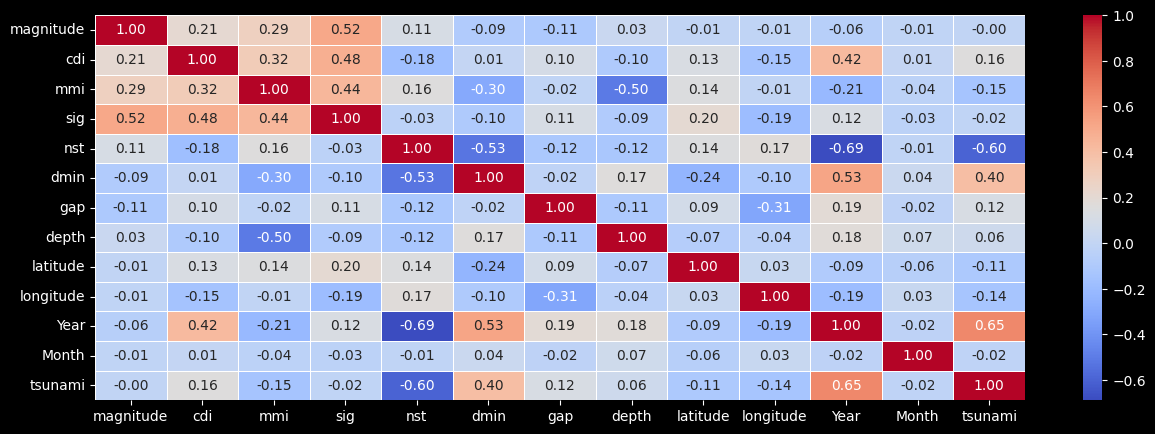

In [ ]:
plt.figure(figsize=(15,5))
sns.heatmap(
    earthq.corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.show()

# **Outlier detection**

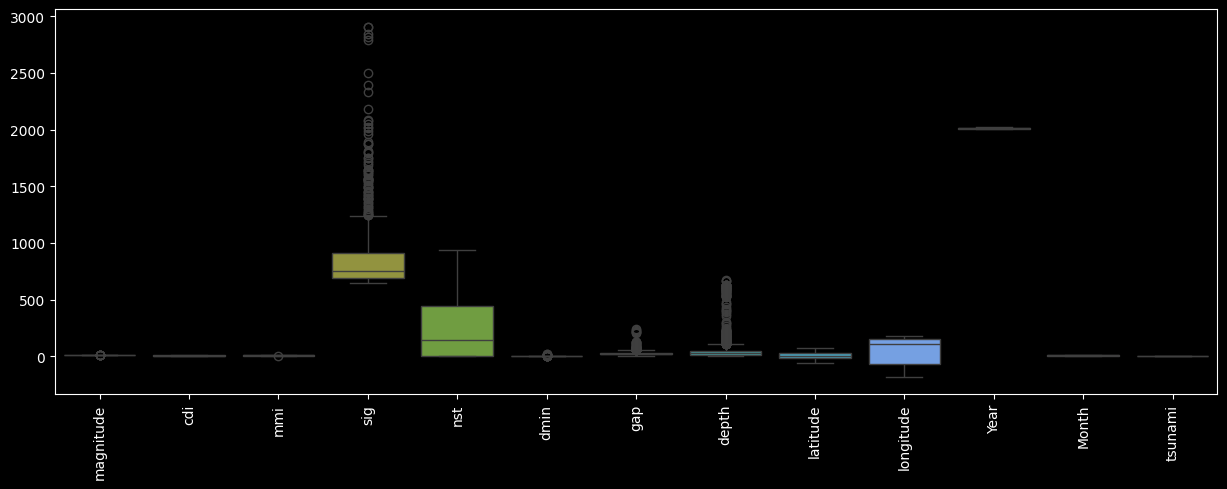

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=earthq)
plt.xticks(rotation=90)
plt.show()


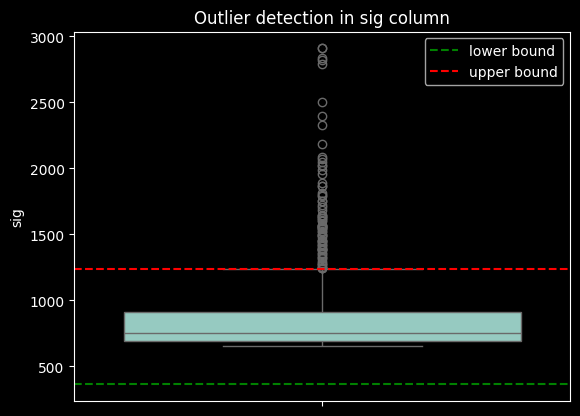

In [ ]:
q1=earthq.sig.quantile(0.25)
q3=earthq.sig.quantile(0.75)
iqr=q3-q1
lower=q1 - 1.5*iqr
upper = q3 + 1.5 * iqr
sns.boxplot(earthq.sig)
plt.axhline(y=lower,
            color="green",
           label="lower bound",
           linestyle="--")
plt.axhline(y=upper,
            color="red",
           label="upper bound",
           linestyle="--")
plt.legend()
plt.title("Outlier detection in sig column")
plt.show()

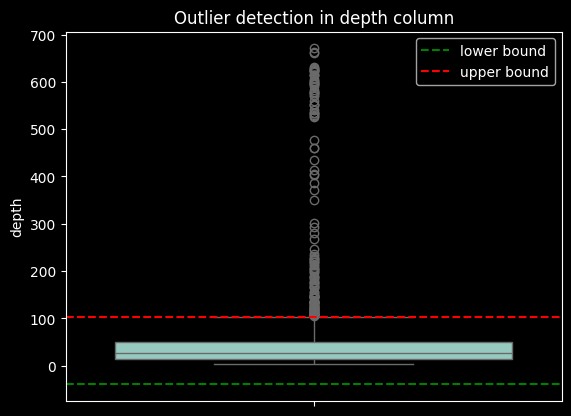

In [ ]:
q1=earthq.depth.quantile(0.25)
q3=earthq.depth.quantile(0.75)
iqr=q3-q1
lower=q1 - 1.5*iqr
upper = q3 + 1.5 * iqr
sns.boxplot(earthq.depth)
plt.axhline(y=lower,
            color="green",
           label="lower bound",
           linestyle="--")
plt.axhline(y=upper,
            color="red",
           label="upper bound",
           linestyle="--")
plt.legend()
plt.title("Outlier detection in depth column")
plt.show()

In [ ]:
Q1 = earthq.quantile(0.25)
Q3 = earthq.quantile(0.75)
IQR = Q3 - Q1

earthq_clean = earthq[
    ~((earthq < (Q1 - 1.5 * IQR)) | (earthq > (Q3 + 1.5 * IQR))).any(axis=1)
]

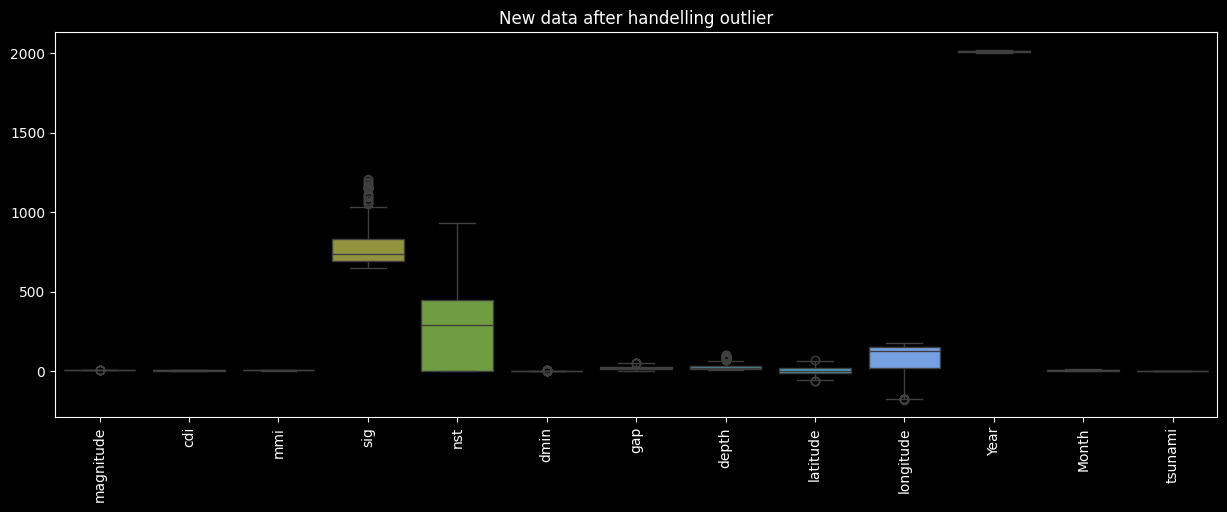

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=earthq_clean)
plt.xticks(rotation=90)
plt.title('New data after handelling outlier')
plt.show()


## **Model training**

In [ ]:
x=np.array(earthq_clean.drop(columns=["tsunami"]))
y=np.array(earthq_clean.tsunami)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (382, 12)
x_test shape (96, 12)
y_train shape (382,)
y_test shape (96,)


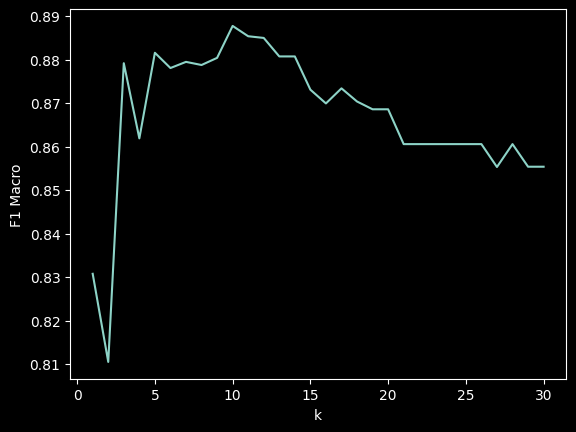

In [ ]:
k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, x_train, y_train, cv=5, scoring="f1_macro").mean()
    scores.append(score)

plt.plot(k_values, scores)
plt.xlabel("k")
plt.ylabel("F1 Macro")
plt.show()


**choosing value k value between 10-15**

## **Train model from KNeighborsClassifier**

In [ ]:
knnc =KNeighborsClassifier(13)
knnc.fit(x_train,y_train)
print("Train score :",knnc.score(x_train,y_train))
print("Test score :",knnc.score(x_test,y_test))
print("Classification report:\n")
print(classification_report(y_test,knnc.predict(x_test)))

Train score : 0.8979057591623036
Test score : 0.8958333333333334
Classification report:

              precision    recall  f1-score   support

           0       0.90      0.93      0.92        60
           1       0.88      0.83      0.86        36

    accuracy                           0.90        96
   macro avg       0.89      0.88      0.89        96
weighted avg       0.90      0.90      0.90        96



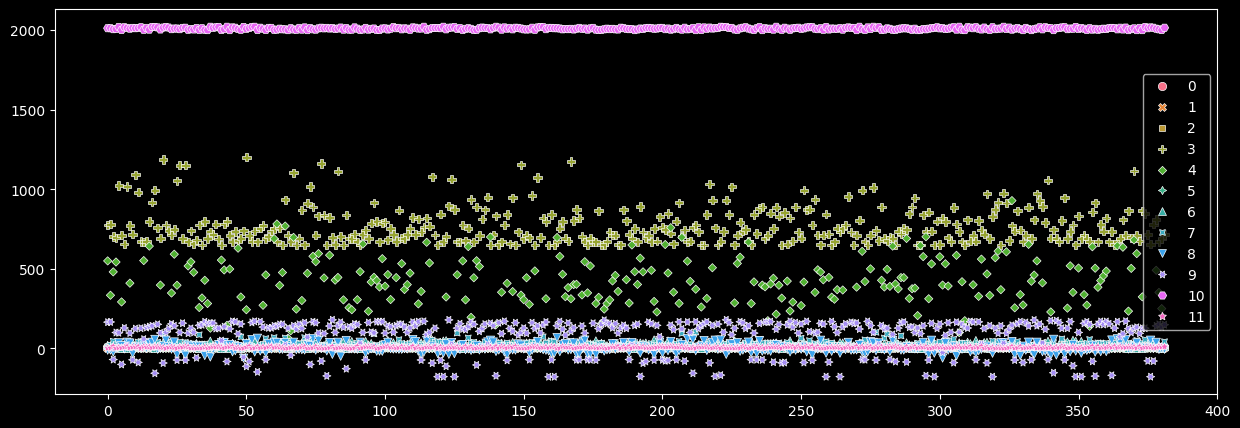

In [ ]:
plt.figure(figsize=(15,5))
sns.scatterplot(x_train)
plt.show()

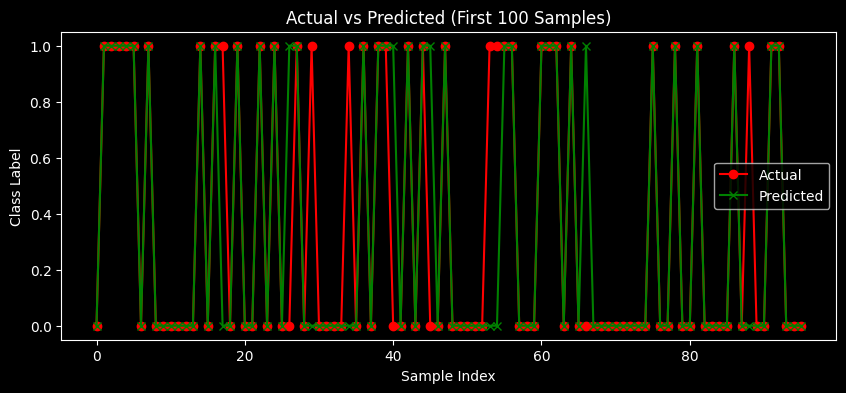

In [ ]:
y_pred=knnc.predict(x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_test[:100], label="Actual", marker='o',c="red")
plt.plot(y_pred[:100], label="Predicted", marker='x',c="green")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted (First 100 Samples)")
plt.show()


## **Cross validation for KNN**

In [ ]:
scores=cross_val_score(knnc,
               x_train,
               y_train,
               cv=10)
print("Cross validation :",scores)
print("-+"*50)
print("Average accuracy :",scores.mean())

Cross validation : [0.84615385 0.82051282 0.94736842 0.92105263 0.94736842 0.84210526
 0.89473684 0.92105263 0.76315789 0.97368421]
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Average accuracy : 0.887719298245614


## **Training model from Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,
                          max_depth=3)
rf.fit(x_train,y_train)
print("Train score :",rf.score(x_train,y_train))
print("Test score :",rf.score(x_test,y_test))
print("Classification report:\n")
print(classification_report(y_test,rf.predict(x_test)))

Train score : 0.8821989528795812
Test score : 0.8958333333333334
Classification report:

              precision    recall  f1-score   support

           0       0.95      0.88      0.91        60
           1       0.82      0.92      0.87        36

    accuracy                           0.90        96
   macro avg       0.89      0.90      0.89        96
weighted avg       0.90      0.90      0.90        96



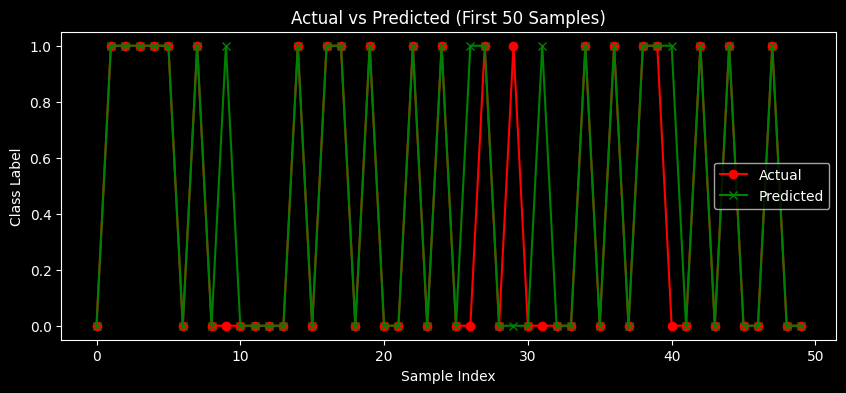

In [ ]:
y_pred=rf.predict(x_test)
plt.figure(figsize=(10, 4))
plt.plot(y_test[:50], label="Actual", marker='o',c="red")
plt.plot(y_pred[:50], label="Predicted", marker='x',c="green")

plt.legend()
plt.xlabel("Sample Index")
plt.ylabel("Class Label")
plt.title("Actual vs Predicted (First 50 Samples)")
plt.show()


# **Cross validation for Random forest**

In [ ]:
scores=cross_val_score(rf,
               x_train,
               y_train,
               cv=10)
print("Cross validation :",scores)
print("-+"*50)
print("Average accuracy :",scores.mean())

Cross validation : [0.87179487 0.92307692 0.86842105 0.84210526 0.97368421 0.81578947
 0.81578947 0.89473684 0.81578947 0.89473684]
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Average accuracy : 0.8715924426450743


## **Difference**
- **KNN**
  - Accuracy : 88 (Cross verified)[**With minimal overfitting**]
- **Random forest**
   - Accuracy : 91  [**With overfitting**]
   - Accuracy : 86 (Cross verified) [**With minimal overfitting**]
